# Introduction to Neural Networks


### Sigmoid Functions

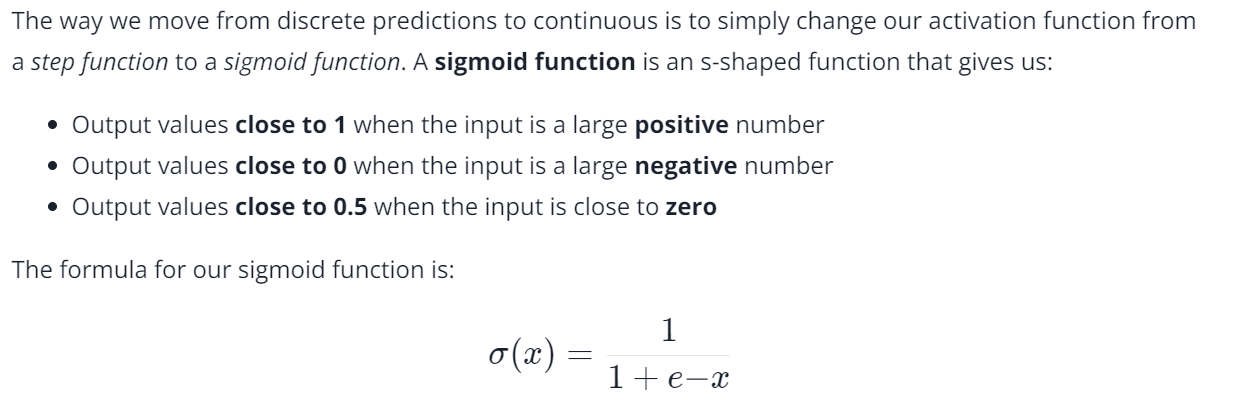


### The Softmax Function
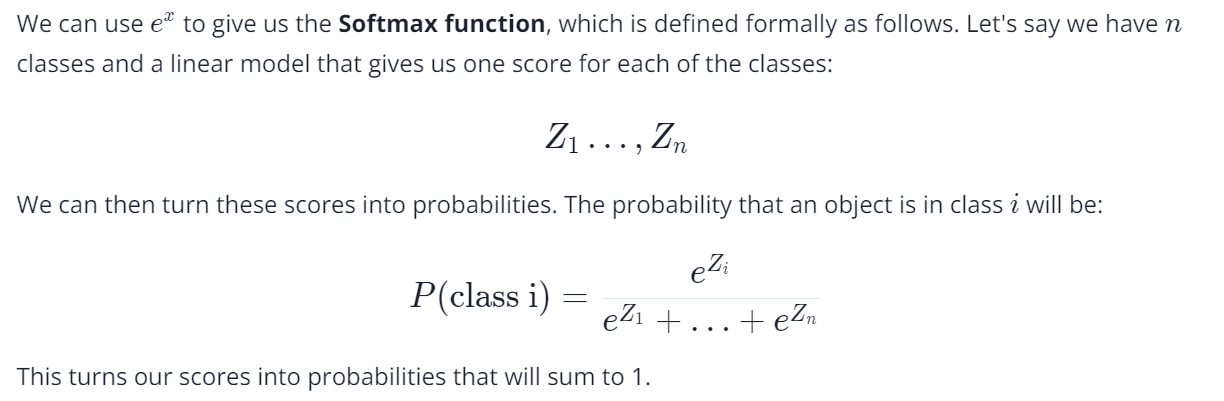

### The Cross-Entropy Formula
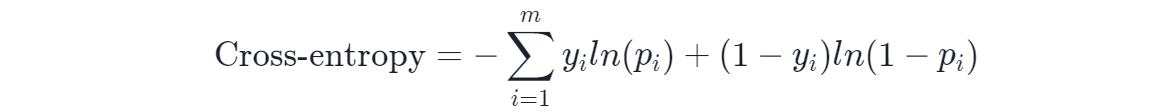

### Multi Class Cross-Entropy Formula
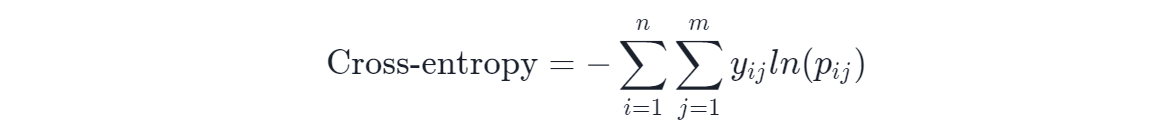

In [6]:
def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result


def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

### Error function

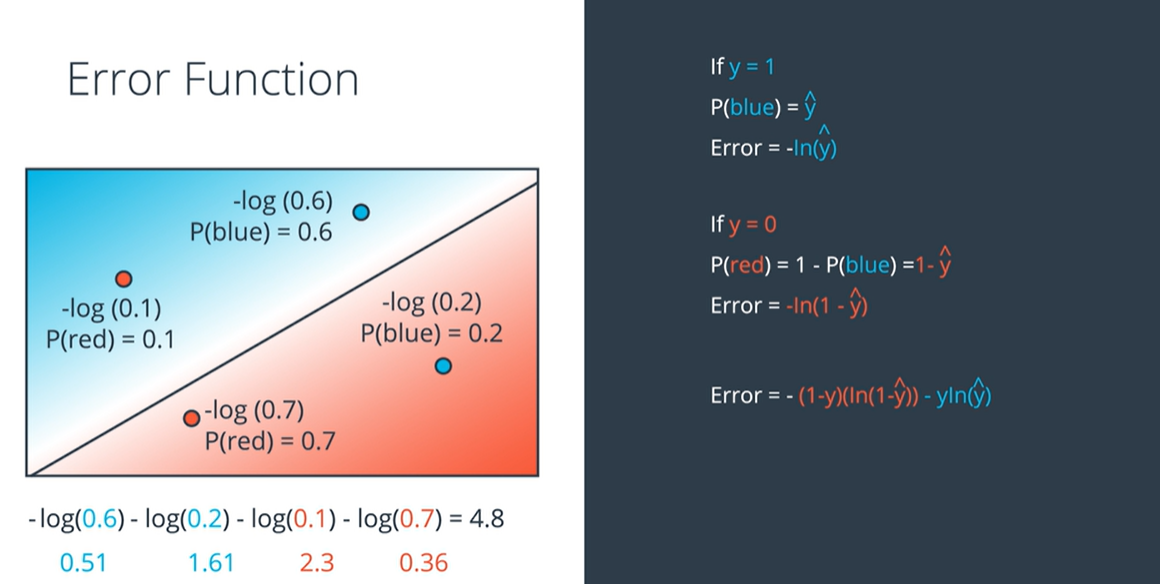

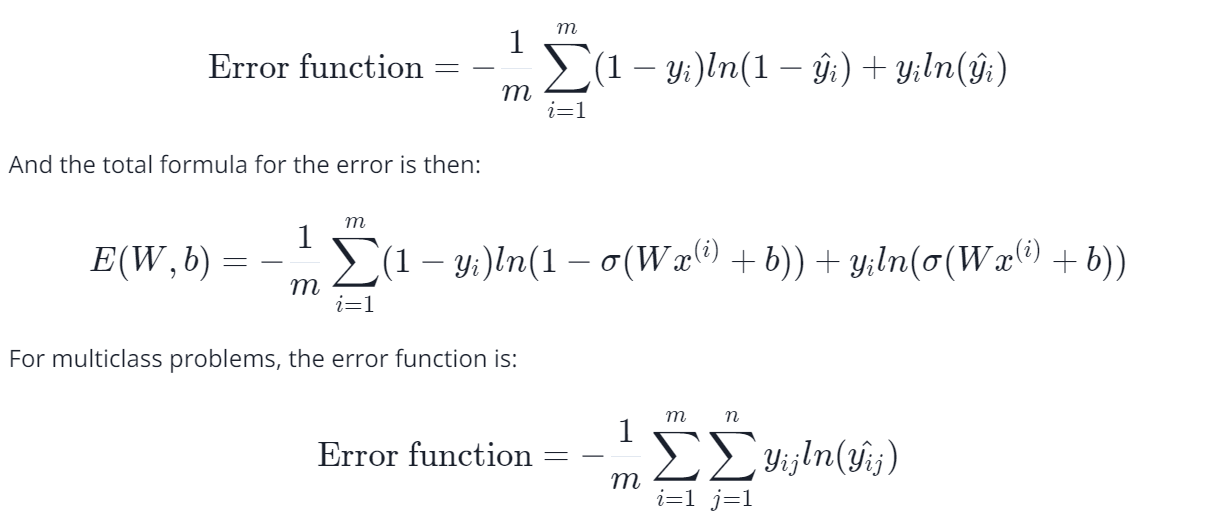


### Gradient Calculation
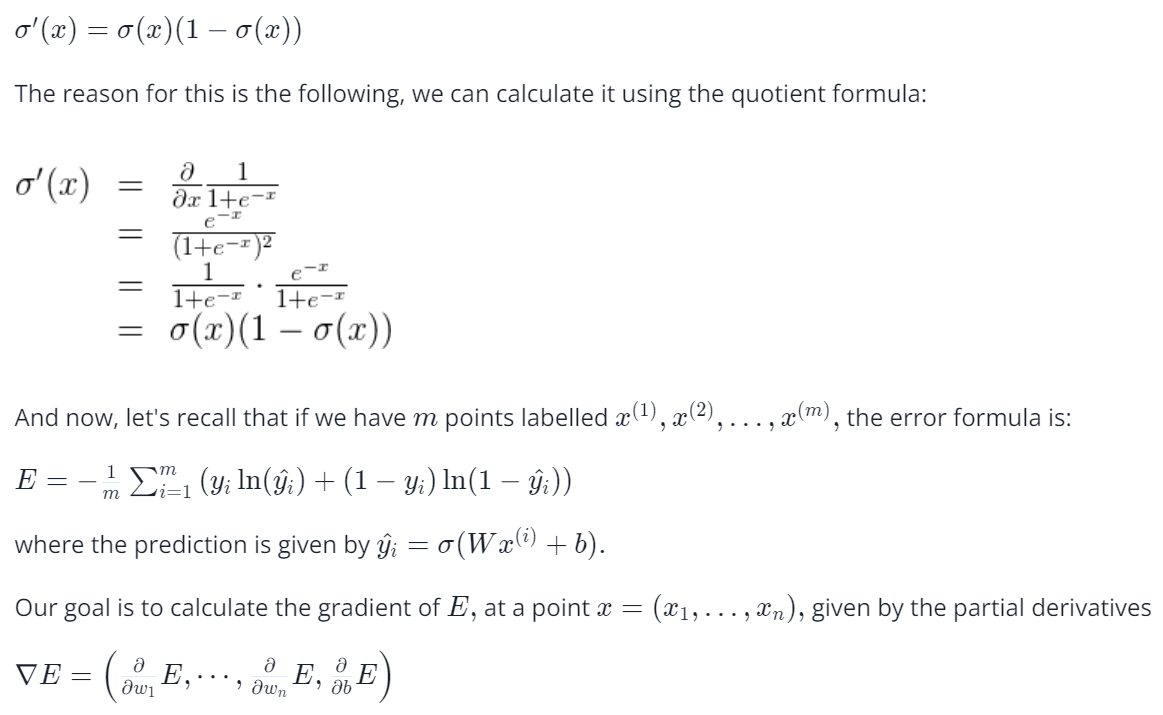

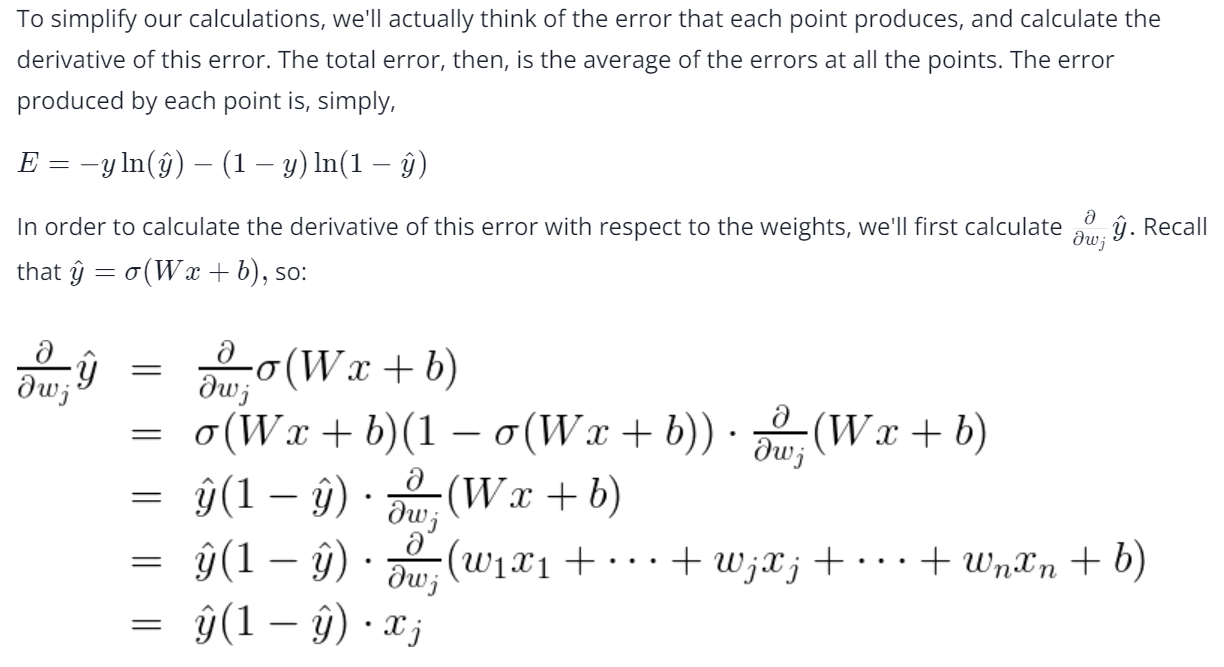

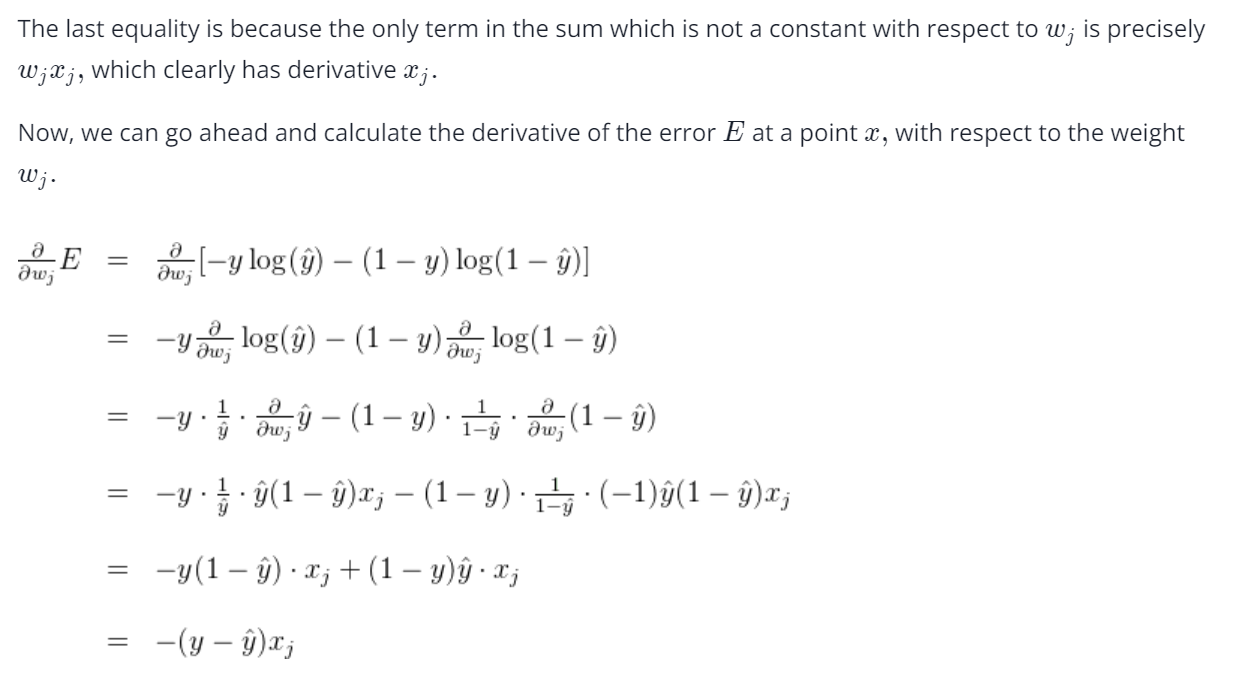

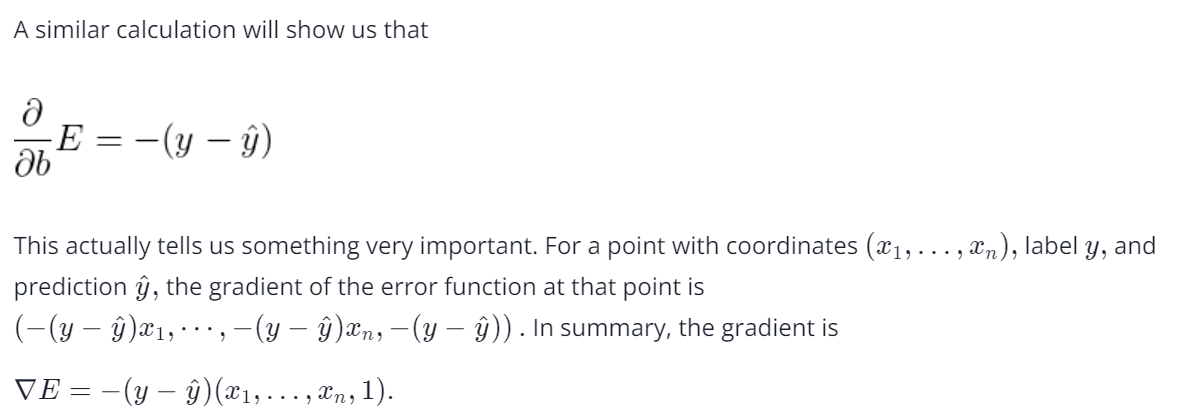

### Gradient Descent Step

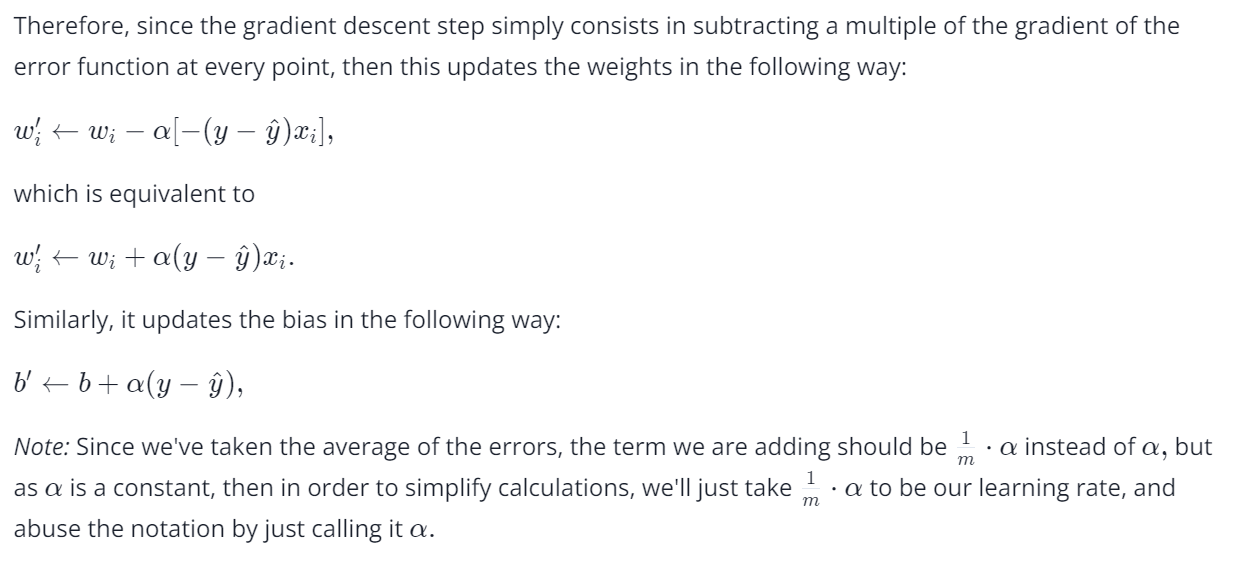

## Implementing the Gradient Descent Algorithm


* `sigmoid`: The sigmoid activation function.
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

* `output_formula`: The formula for the prediction.
$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$


* `error_formula`: The formula for the error at a point.
$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$



* `update_weights`: The function that updates the parameters with one gradient descent step.
$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([
        s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [24]:
data = pd.read_csv('perceptron_algorithm.csv', header=None)

X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1:])

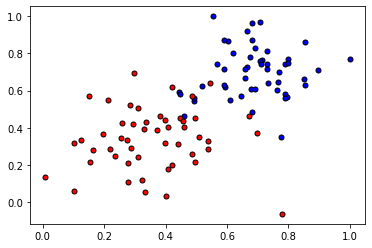

In [26]:
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [28]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Gradient descent stepa
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [29]:
# Training function

np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669507
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.45933346418614013
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.39734615716713984
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.37414697652390744
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.33792736588799216
Accuracy:  0.94


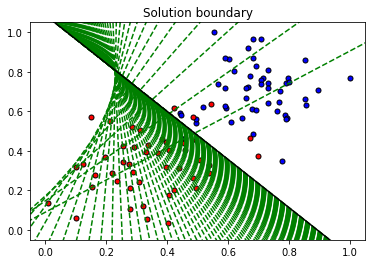

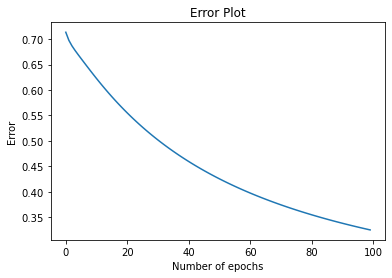

In [30]:
train(X, y, epochs, learnrate, True)

# Exercise: Analyzing Student Data

In [31]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
5      1  760  3.00     2
6      1  560  2.98     1
7      0  400  3.08     2
8      1  540  3.39     3
9      0  700  3.92     2

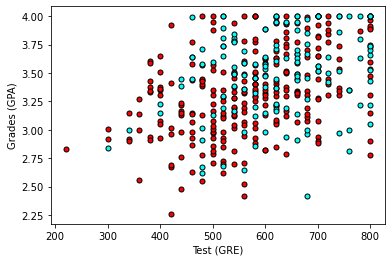

In [32]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

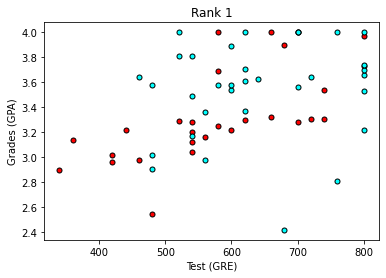

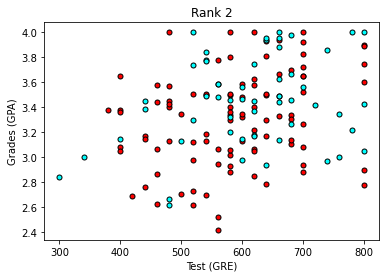

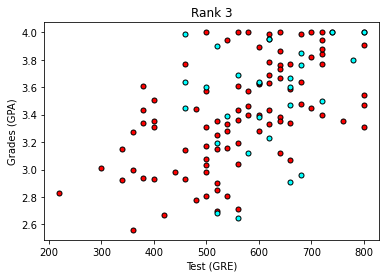

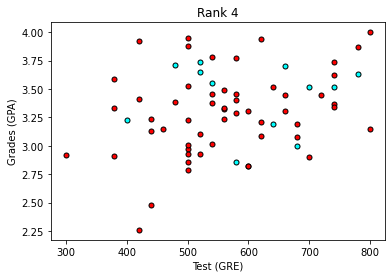

In [33]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

In [34]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

admit  gre   gpa  rank_1  rank_2  rank_3  rank_4
0      0  380  3.61       0       0       1       0
1      1  660  3.67       0       0       1       0
2      1  800  4.00       1       0       0       0
3      1  640  3.19       0       0       0       1
4      0  520  2.93       0       0       0       1
5      1  760  3.00       0       1       0       0
6      1  560  2.98       1       0       0       0
7      0  400  3.08       0       1       0       0
8      1  540  3.39       0       0       1       0
9      0  700  3.92       0       1       0       0

In [35]:
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
0      0  0.475  0.9025       0       0       1       0
1      1  0.825  0.9175       0       0       1       0
2      1  1.000  1.0000       1       0       0       0
3      1  0.800  0.7975       0       0       0       1
4      0  0.650  0.7325       0       0       0       1
5      1  0.950  0.7500       0       1       0       0
6      1  0.700  0.7450       1       0       0       0
7      0  0.500  0.7700       0       1       0       0
8      1  0.675  0.8475       0       0       1       0
9      0  0.875  0.9800       0       1       0       0

In [36]:
# Splitting the data into Training and Testing

sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
263      1  0.775  0.9875       0       0       1       0
304      0  0.275  0.7075       0       0       1       0
172      0  0.850  0.8700       0       0       1       0
379      0  0.675  0.6750       0       1       0       0
290      1  0.775  0.8625       0       1       0       0
261      0  0.550  0.7875       0       1       0       0
186      0  0.700  0.9025       0       0       1       0
274      0  0.650  0.7800       0       1       0       0
43       0  0.625  0.8275       0       0       1       0
7        0  0.500  0.7700       0       1       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
1       1  0.825  0.9175       0       0       1       0
14      1  0.875  1.0000       1       0       0       0
18      0  1.000  0.9375       0       1       0       0
50      0  0.800  0.9650       0       0       1       0
57      0  

In [37]:
# Splitting the data into features and targets (labels)

features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
263  0.775  0.9875       0       0       1       0
304  0.275  0.7075       0       0       1       0
172  0.850  0.8700       0       0       1       0
379  0.675  0.6750       0       1       0       0
290  0.775  0.8625       0       1       0       0
261  0.550  0.7875       0       1       0       0
186  0.700  0.9025       0       0       1       0
274  0.650  0.7800       0       1       0       0
43   0.625  0.8275       0       0       1       0
7    0.500  0.7700       0       1       0       0
263    1
304    0
172    0
379    0
290    1
261    0
186    0
274    0
43     0
7      0
Name: admit, dtype: int64


In [38]:
# Training the 2-layer Neural Network

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

In [39]:
# Backpropagate the error

def error_term_formula(x, y, output):
    return (y - output)*sigmoid_prime(x)

In [40]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.27106480594226784
Epoch: 100
Train loss:  0.21194326681500797
Epoch: 200
Train loss:  0.20966804365075242
Epoch: 300
Train loss:  0.20854655900426194
Epoch: 400
Train loss:  0.20795593418829533
Epoch: 500
Train loss:  0.20760631706625537
Epoch: 600
Train loss:  0.20736854529015813
Epoch: 700
Train loss:  0.20718454795000316
Epoch: 800
Train loss:  0.20702767079218062
Epoch: 900
Train loss:  0.20688539268943396
Finished training!


In [41]:
# Calculating the Accuracy on the Test Data

# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.775
